# Generate GeoJSON from Natural Earth Data

## Install Dependencies

```
pip install geopandas shapely matplotlib
```

## Download Data

Download datasets (_Admin 0 - Countries_ in [1:10](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/), and _Admin 1 – States, Provinces_ in 1:10 and [1:50](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/)) from Natural Earch Data:

In [21]:
import os
import requests

data_dir = os.path.expanduser("~/Downloads")
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

def download_files(skip_existing=True):
    for url in [
        "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip",
        "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip",
        "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces.zip"
    ]:
        file_name = url.split('/')[-1]
        full_file_name = f'{data_dir}/{file_name}'
        with requests.get(
            url,
            headers={
                "accept-encoding": "gzip, deflate, br",
                "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36"
            },
            stream=True,
        ) as res:
            file_size = int(res.headers['content-length'])
            if res.status_code != 200:
                print("Error downloading files. Please open the URL to download them from browser manually.")
                break
            if (
                skip_existing and
                os.path.exists(full_file_name) and
                file_size == os.path.getsize(full_file_name)
            ):
                print(f"Skip {file_name} because it already exists")
                continue
            print(f"Downloading {file_name}... \r", end="")
            with open(full_file_name, "wb") as fh:
                fh.write(res.content)
    print("Done.                                                               ")

download_files(skip_existing=True)

Skip ne_10m_admin_0_countries.zip because it already exists
Skip ne_10m_admin_1_states_provinces.zip because it already exists
Skip ne_50m_admin_1_states_provinces.zip because it already exists
Done.                                                               


In [22]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely

df_admin0_10m = gpd.read_file(f"{data_dir}/ne_10m_admin_0_countries.zip")
df_10m = gpd.read_file(f"{data_dir}/ne_10m_admin_1_states_provinces.zip")
df_50m = gpd.read_file(f"{data_dir}/ne_50m_admin_1_states_provinces.zip")

In [23]:
df_50m.columns

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)

In [24]:
df_admin0_10m.columns = df_admin0_10m.columns.str.lower()
df_admin0_10m.columns

Index(['featurecla', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'tlc', 'admin',
       ...
       'fclass_tr', 'fclass_id', 'fclass_pl', 'fclass_gr', 'fclass_it',
       'fclass_nl', 'fclass_se', 'fclass_bd', 'fclass_ua', 'geometry'],
      dtype='object', length=169)

In [25]:
df_50m.groupby('admin').count()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
admin,,,,,,,,,,,,,,,,,,,,,
Australia,9,9,9,9,9,0,9,9,9,0,...,0,0,0,0,0,0,0,0,0,9
Brazil,27,27,27,27,27,0,27,27,27,13,...,0,0,0,0,0,0,0,0,0,27
Canada,13,13,13,13,13,13,13,13,13,9,...,0,0,0,0,0,0,0,0,0,13
China,31,31,31,31,31,0,31,31,31,30,...,0,0,0,0,0,0,0,0,0,31
India,36,36,36,36,36,0,36,36,36,13,...,0,0,0,0,0,0,0,0,0,36
Indonesia,33,33,33,33,33,0,33,33,33,30,...,0,0,0,0,0,0,0,0,0,33
Russia,85,85,85,85,85,1,85,85,85,84,...,0,0,0,0,0,0,0,0,0,85
South Africa,9,9,9,9,9,0,9,9,9,9,...,0,0,0,0,0,0,0,0,0,9
United States of America,51,51,51,51,51,51,51,51,51,51,...,0,0,0,0,0,0,0,0,0,51


<AxesSubplot:>

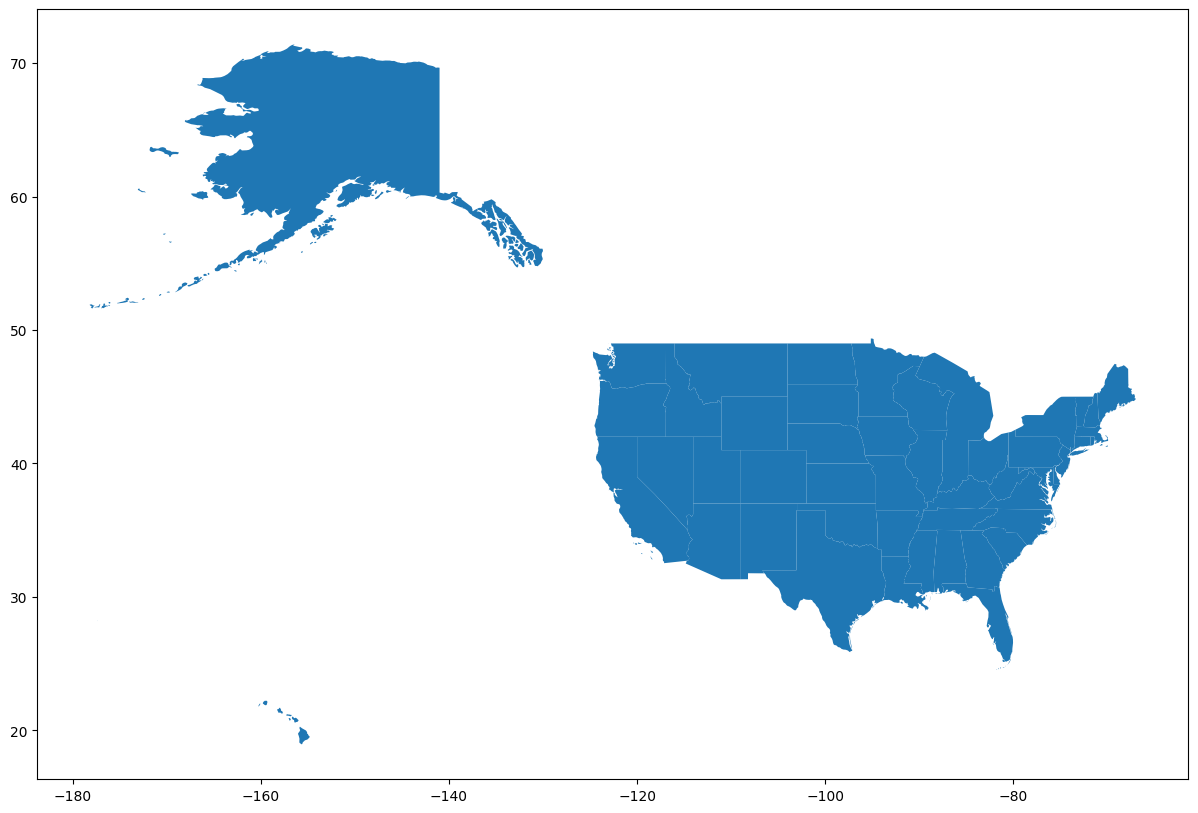

In [26]:
df_50m[df_50m.adm0_a3 == 'USA'].plot(figsize=(20,10))

Use 1:50m geometry for some large countries:

In [27]:
df_50m['admin'].unique()

array(['Australia', 'Brazil', 'Canada', 'United States of America',
       'China', 'India', 'Indonesia', 'Russia', 'South Africa'],
      dtype=object)

In [28]:
import pandas as pd

df = pd.concat([df_10m[~df_10m['admin'].isin(df_50m['admin'].unique())], df_50m])

## Adjust the Maps

<span style="color: red; font-size: 1.5em">TO SUPPORT NEW COUNTRIES, ADD COUNTRY NAME BELOW</span>

In [29]:
# Country names used in file names
countries = [
  'aland',
  'argentina',
  'australia',
  'belgium',
  'bolivia',
  'botswana',
  'brazil',
  'bulgaria',
  'burundi',
  'canada',
  'chile',
  'china',
  'colombia',
  'costa rica',
  'cuba',
  'denmark',
  'dominican republic',
  'ecuador',
  'egypt',
  'el salvador',
  'estonia',
  'ethiopia',
  'france',
  'finland',
  'germany',
  'guatemala',
  'haiti',
  'honduras',
  'iceland',
  'india',
  'indonesia',
  'iran',
  'italy',
  'japan',
  'kenya',
  'korea',
  'latvia',
  'liechtenstein',
  'malaysia',
  'mexico',
  'morocco',
  'myanmar',
  'netherlands',
  'nicaragua',
  'nigeria',
  'norway',
  'panama',
  'paraguay',
  'portugal',
  'poland',
  'puerto rico',
  'russia',
  'rwanda',
  'saint barthelemy',
  'saint martin',
  'singapore',
  'slovenia',
  'spain',
  'sweden',
  'switzerland',
  'syria',
  'tanzania',
  'thailand',
  'timorleste',
  'uganda',
  'uk',
  'ukraine',
  'uruguay',
  'usa',
  'venezuela',
  'zambia',
]

# country name used in dataset
country_name_aliases = {
    "uk": "united kingdom",
    "usa": "united states of america",
    "korea": "south korea",
    "timorleste": "east timor",
    "tanzania": "united republic of tanzania",
}

# Make sure all country names are covered:
invalid_countries = [x for x in countries if country_name_aliases.get(x, x) not in df["admin"].str.lower().unique()]
if invalid_countries:
  print(f"Following country names are not valid: {invalid_countries}")

Preview all countries:

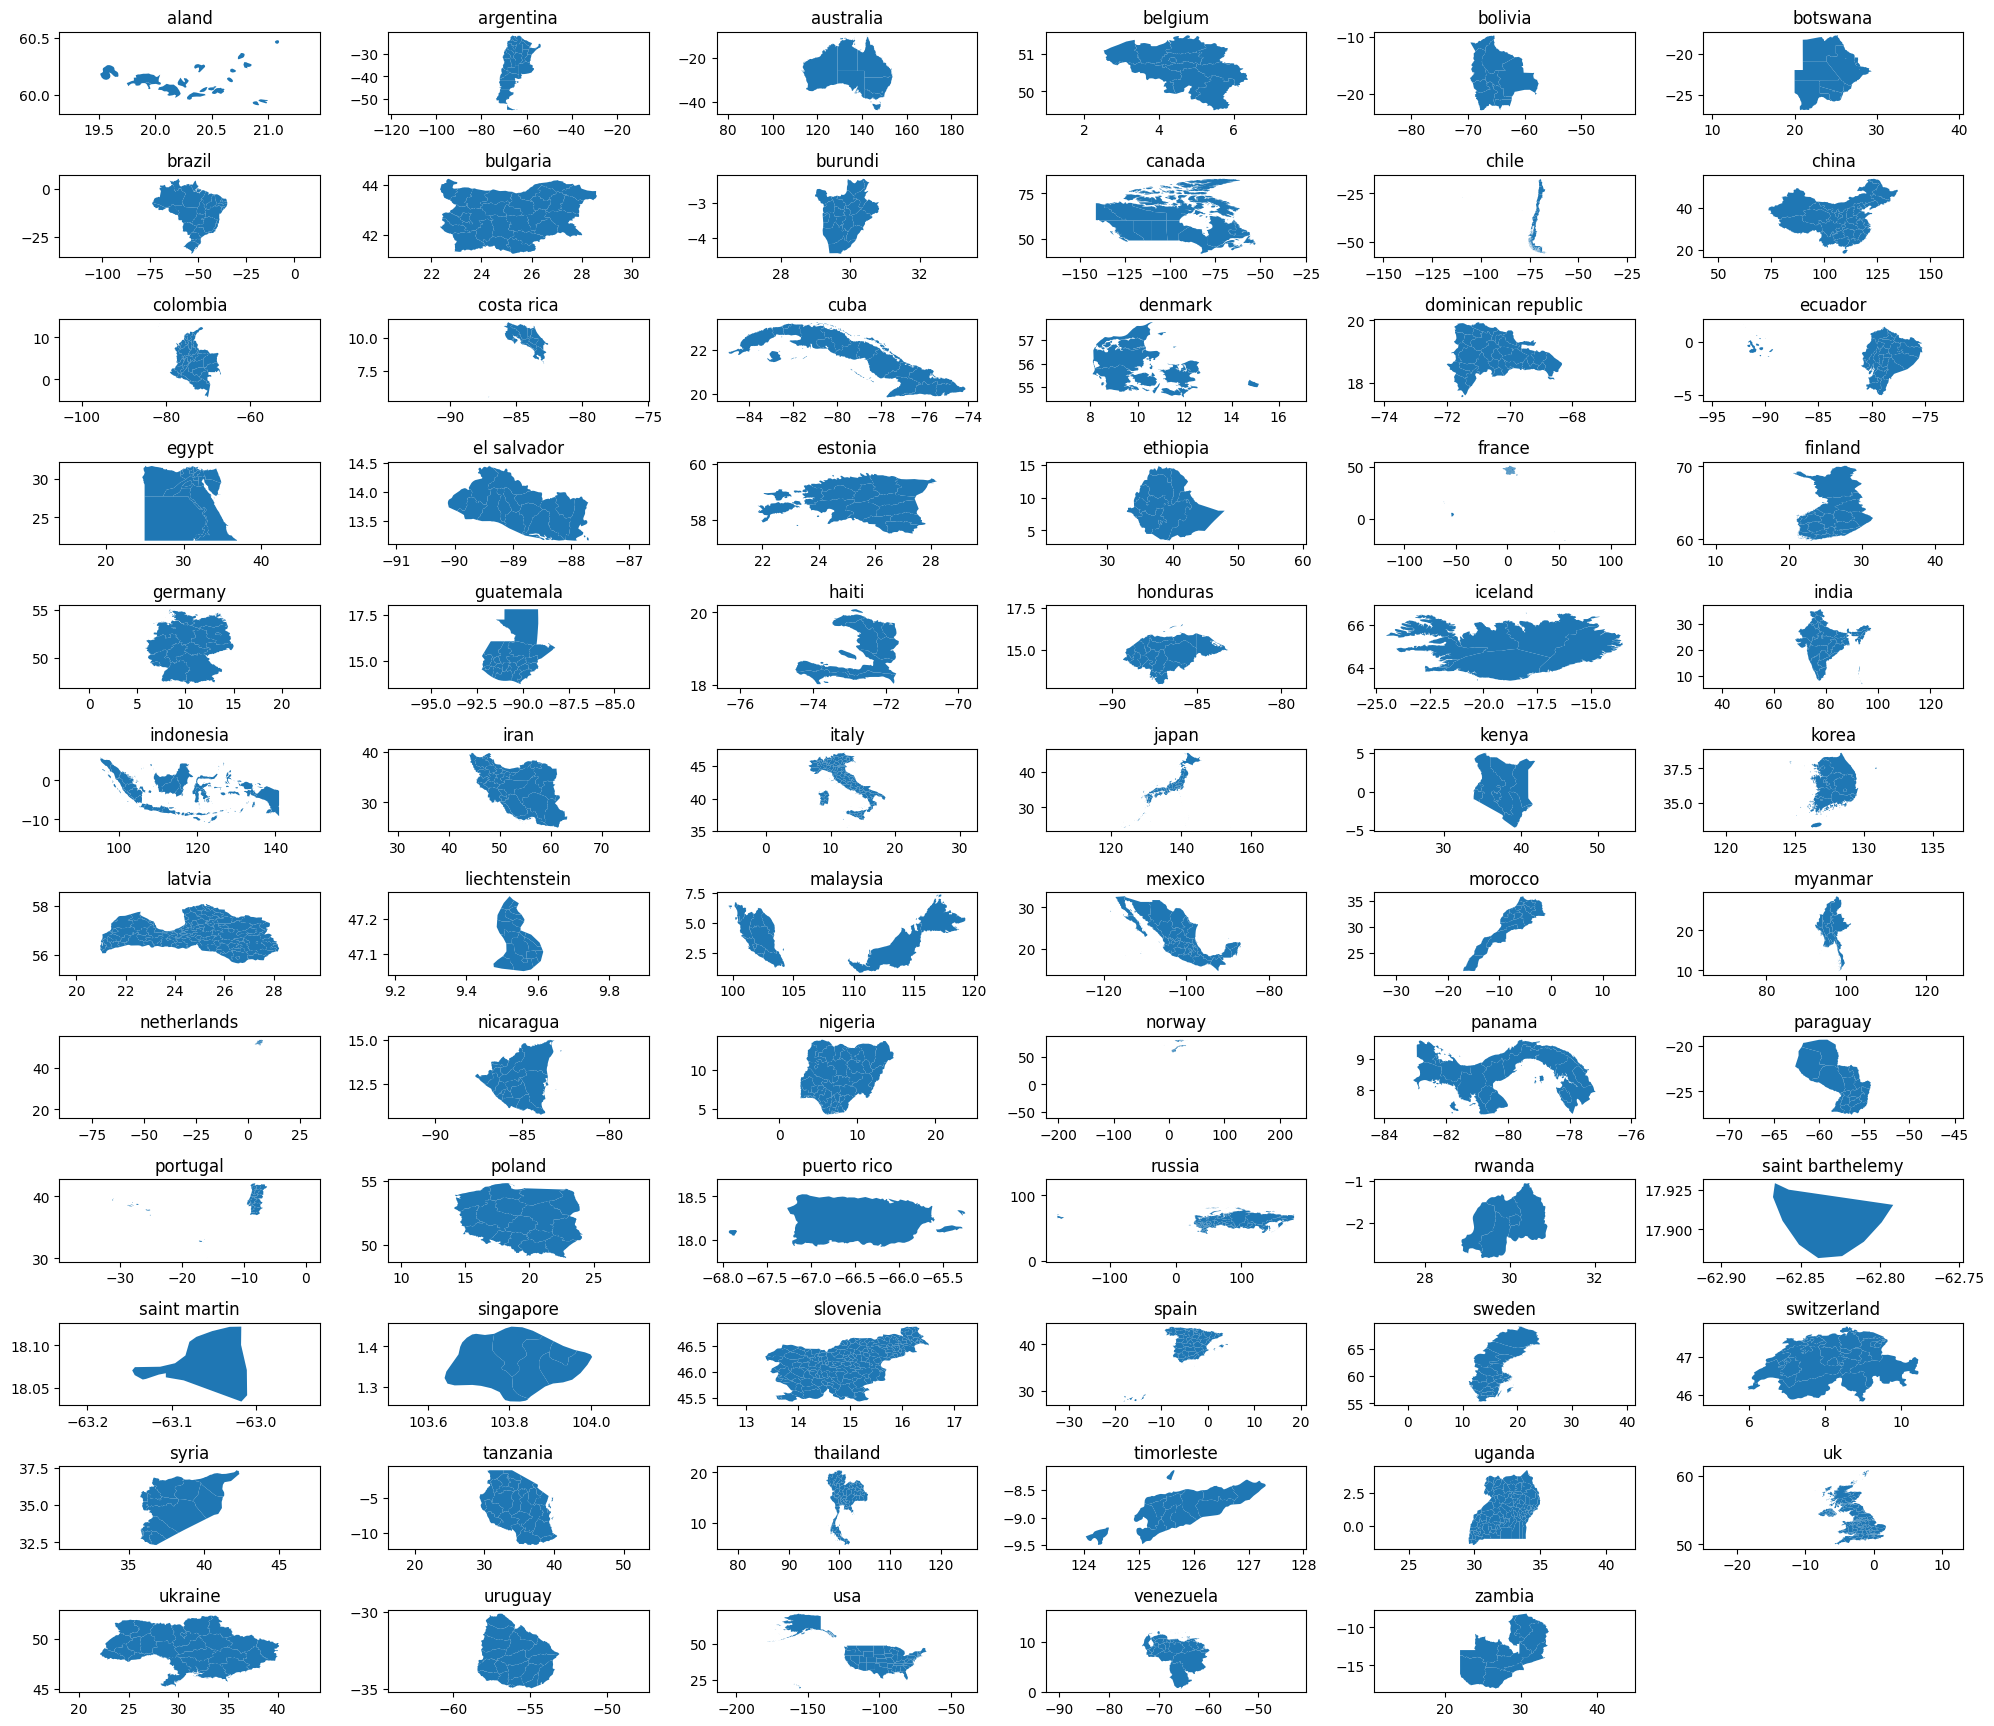

In [30]:
alt_maps = dict()

def get_gdf(country):
    country_alias = country_name_aliases.get(country, country)
    if country in alt_maps:
        gdf = alt_maps[country]
    else:
        gdf = df[df["admin"].str.lower() == country_alias]
    return gdf.copy()

def plot_all_countries():
    plt.figure(figsize=(20, 20))

    for i, country in enumerate(countries):
        # create subplot axes in a 3x3 grid
        ax = plt.subplot(len(countries) // 5, 6, i + 1) # nrows, ncols, axes position
        get_gdf(country).plot(ax=ax)
        ax.set_title(country)
        ax.set_aspect('equal', adjustable='datalim')
    
    plt.tight_layout()
    plt.show()

plot_all_countries()

### Handle countries with flying islands

#### USA

For countries with flying islands, we need to move the islands closer to the mainland.

<AxesSubplot:>

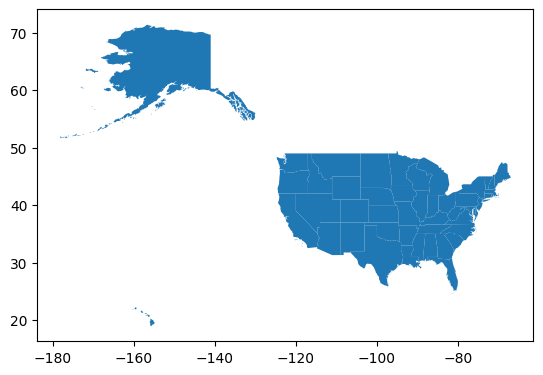

In [31]:
usa = df[df['adm0_a3'] == 'USA']
usa.plot()

<AxesSubplot:>

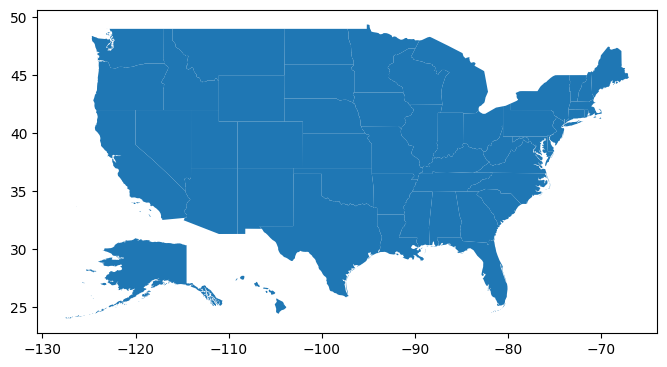

In [32]:
def reposition(df, idx, xoff=None, yoff=None, xscale=None, yscale=None, simplify=None):
    
    def move_and_scale(series):
        if xoff or yoff:
            series = shapely.affinity.translate(series, xoff or 0, yoff or 0)
        if xscale or yscale:
            series = shapely.affinity.scale(series, xscale or 1, yscale or 1)
        if simplify:
            series = series.simplify(simplify, preserve_topology=False)
        return series
    
    df.loc[idx, 'geometry'] = df.loc[idx, 'geometry'].apply(move_and_scale)


usa_copy = usa.copy()
reposition(usa_copy, usa.name == 'Hawaii', 51, 5.5)
reposition(usa_copy, usa.name == 'Alaska', 35, -34, 0.35, 0.35)

usa_copy.plot(figsize=(8,8))

#### China

China claims sovereign over Taiwan. For disputed territories, we respect each country and give them what they want.

In addition, Hong Kong and Macau should also be included in a China map.

In [33]:
# Chinese Special Administrative Regions
china_sars = df_admin0_10m.loc[
    df_admin0_10m.name_en.isin(['Taiwan', 'Hong Kong', 'Macau']),
    [x for x in df_admin0_10m.columns if x in df.columns]
]
china_sars = china_sars.merge(pd.DataFrame(
    data={ 
        "name_en": ["Taiwan", "Hong Kong", "Macau"],
        "name_zh": ["中国台湾", "香港特别行政区", "澳门特别行政区"],
        "iso_3166_2": ["CN-71", "CN-91", "CN-92"],
    },
), on="name_en", how="left")
china_sars

,featurecla,scalerank,labelrank,sov_a3,type,admin,adm0_a3,gu_a3,name,abbrev,...,name_sv,name_tr,name_uk,name_ur,name_vi,name_zh_x,name_zht,geometry,name_zh_y,iso_3166_2
0,Admin-0 country,0,4,CH1,Country,Hong Kong S.A.R.,HKG,HKG,Hong Kong,H.K.,...,Hongkong,Hong Kong,Гонконг,ہانگ کانگ,Hồng Kông,香港,香港,"MULTIPOLYGON (((114.22983 22.55581, 114.23471 ...",香港特别行政区,CN-91
1,Admin-0 country,0,3,TWN,Sovereign country,Taiwan,TWN,TWN,Taiwan,Taiwan,...,Taiwan,Çin Cumhuriyeti,Республіка Китай,تائیوان,Đài Loan,中华民国,中華民國,"MULTIPOLYGON (((121.90577 24.95010, 121.83473 ...",中国台湾,CN-71
2,Admin-0 country,0,4,CH1,Country,Macao S.A.R,MAC,MAC,Macao,Mac.,...,Macao,Makao,Аоминь,مکاؤ,Ma Cao,澳门,澳門,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...",澳门特别行政区,CN-92


<AxesSubplot:>

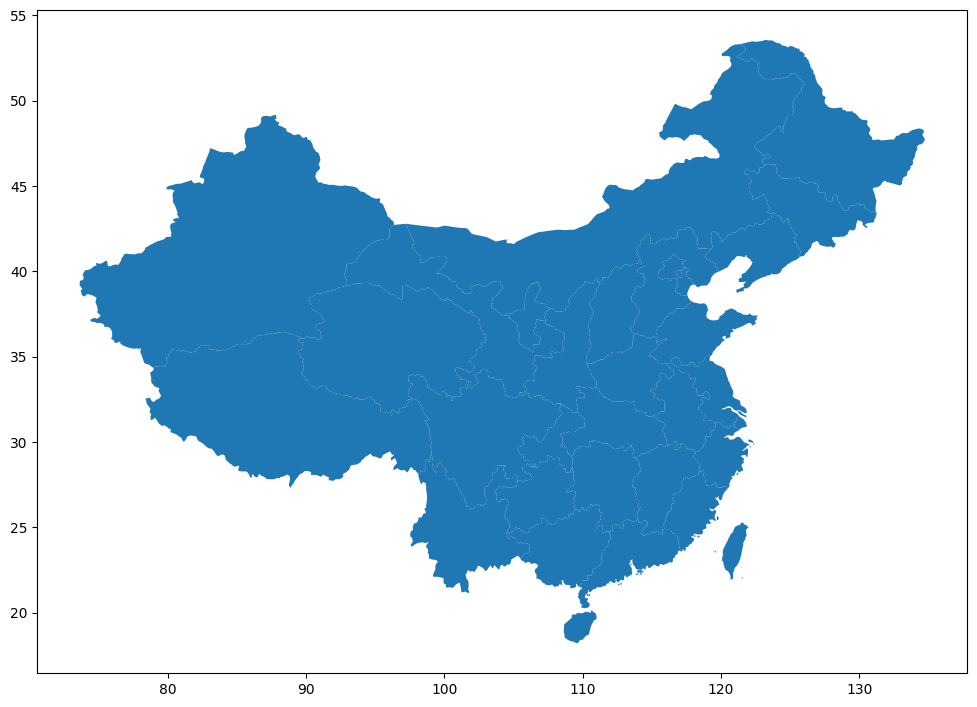

In [34]:
china = df[df.admin == "China"]
china_copy = china.append(china_sars)
china_copy["name_zh"] = china_copy["name_zh"].combine_first(china_copy["name_zh_y"])
china_copy = china_copy.drop(["name_zh_x", "name_zh_y"], axis=1)
china_copy.plot(figsize=(12, 12))

Note [ISO-3166-2:CN](https://en.wikipedia.org/wiki/ISO_3166-2:CN) has updated subdivisions to use letters instead of numbers (e.g. `CN-91` -> `CN-HK`). We kept the numeric code for backward compatibility.

#### Finland

The Åland Islands (ISO country code AX) is an autonomous region of Finland, and carries the ISO-3166 code FI-01. 

In [35]:
finland_aland = df_admin0_10m.loc[
    df_admin0_10m.name_en.isin(['Åland Islands']),
    [x for x in df_admin0_10m.columns if x in df.columns]
]
finland_aland = finland_aland.merge(pd.DataFrame(
    data={ 
        "name_en": ["Åland Islands"],
        "name_fi": ["Ahvenanmaan maakunta"],
        "iso_3166_2": ["FI-01"],
    },
), on="name_en", how="left")


<AxesSubplot:>

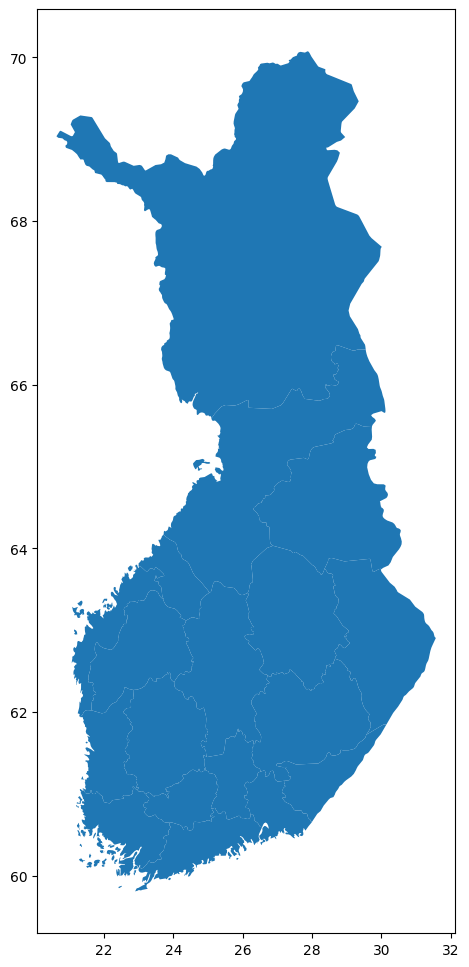

In [36]:
finland = df[df.admin == "Finland"]
finland_copy = finland.append(finland_aland)
finland_copy["name_fi"] = finland_copy["name_fi"].combine_first(finland_copy["name_fi"])
finland_copy = finland_copy.drop(["name_fi"], axis=1)
finland_copy.plot(figsize=(12, 12))

#### Norway

Remove NO-X01~ (The uninhabited Bouvet Island) and move Svalbard closer to mainland

<AxesSubplot:>

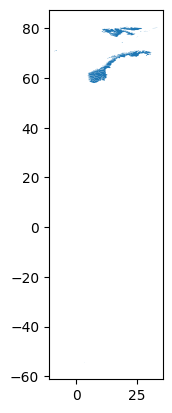

In [37]:
norway = df[df['adm0_a3'] == 'NOR']
norway.plot()

<AxesSubplot:>

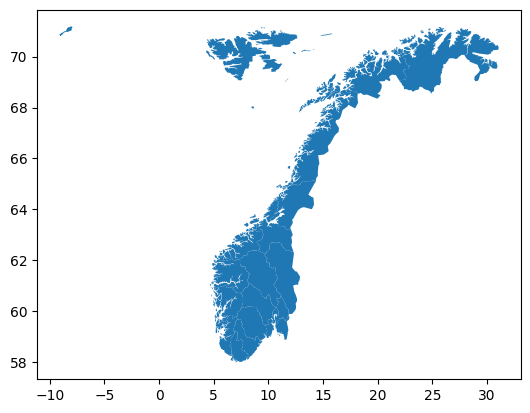

In [38]:
norway_copy = norway.copy()
norway_copy = norway_copy[norway_copy["iso_3166_2"] != "NO-X01~"]
reposition(norway_copy, norway.name == 'Svalbard', -12, -8, 0.5, 0.5)
#reposition(norway_copy, norway.name == 'Nordland', 10, 0, 2, 2)

norway_copy.plot()

#### Portugal

<AxesSubplot:>

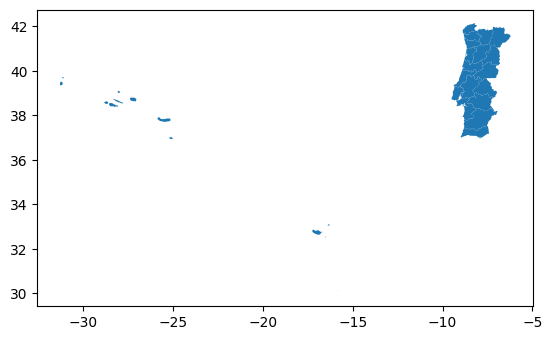

In [39]:
portugal = df[df.admin == 'Portugal']
portugal.plot()

<AxesSubplot:>

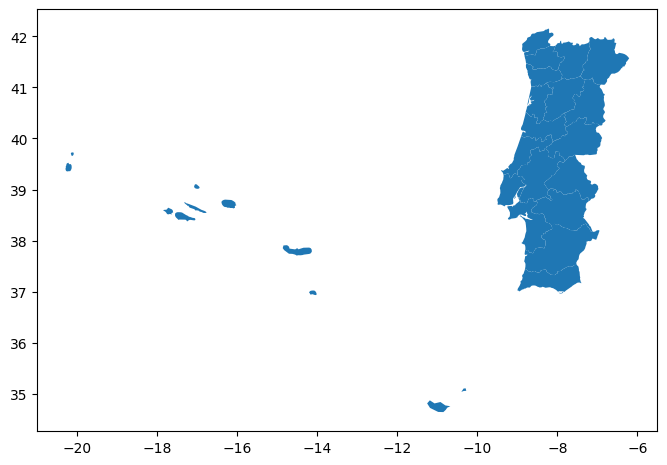

In [40]:
portugal_copy = portugal.copy()
reposition(portugal_copy, portugal.name == 'Azores', 11, 0)
reposition(portugal_copy, portugal.name == 'Madeira', 6, 2, simplify=0.015)
portugal_copy.plot(figsize=(8, 8))

#### Spain

<AxesSubplot:>

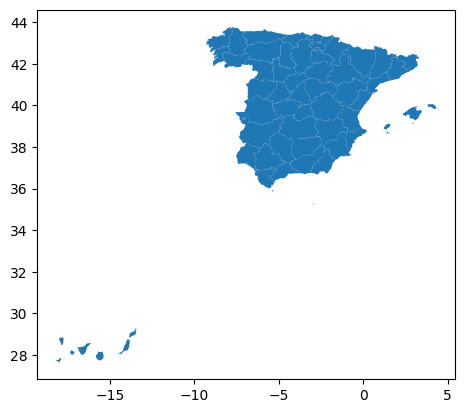

In [41]:
spain = df[df.admin == 'Spain']
spain.plot()

<AxesSubplot:>

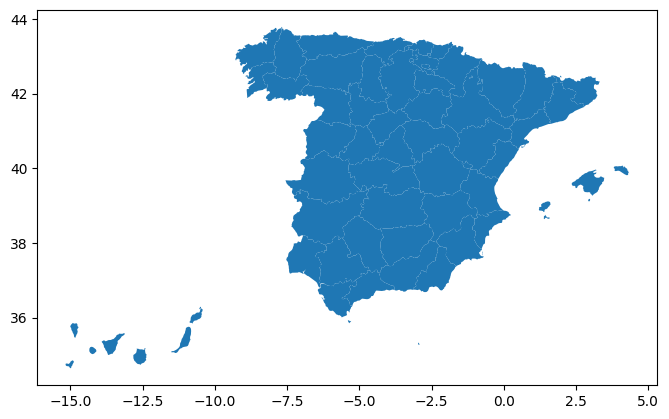

In [42]:
spain_copy = spain.copy()
reposition(spain_copy, spain.name.isin(['Las Palmas', 'Santa Cruz de Tenerife']), 3, 7, 1, 1)
spain_copy.plot(figsize=(8, 8))

#### Russia

<AxesSubplot:>

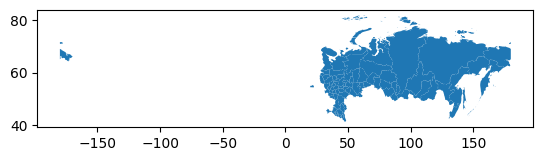

In [43]:
russia = df[df.admin == 'Russia']
russia.plot()

Russia looks off because of Chukchi runs across E180. We need to move the parts on the other side of the map to the right.

/Users/chris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  


<AxesSubplot:>

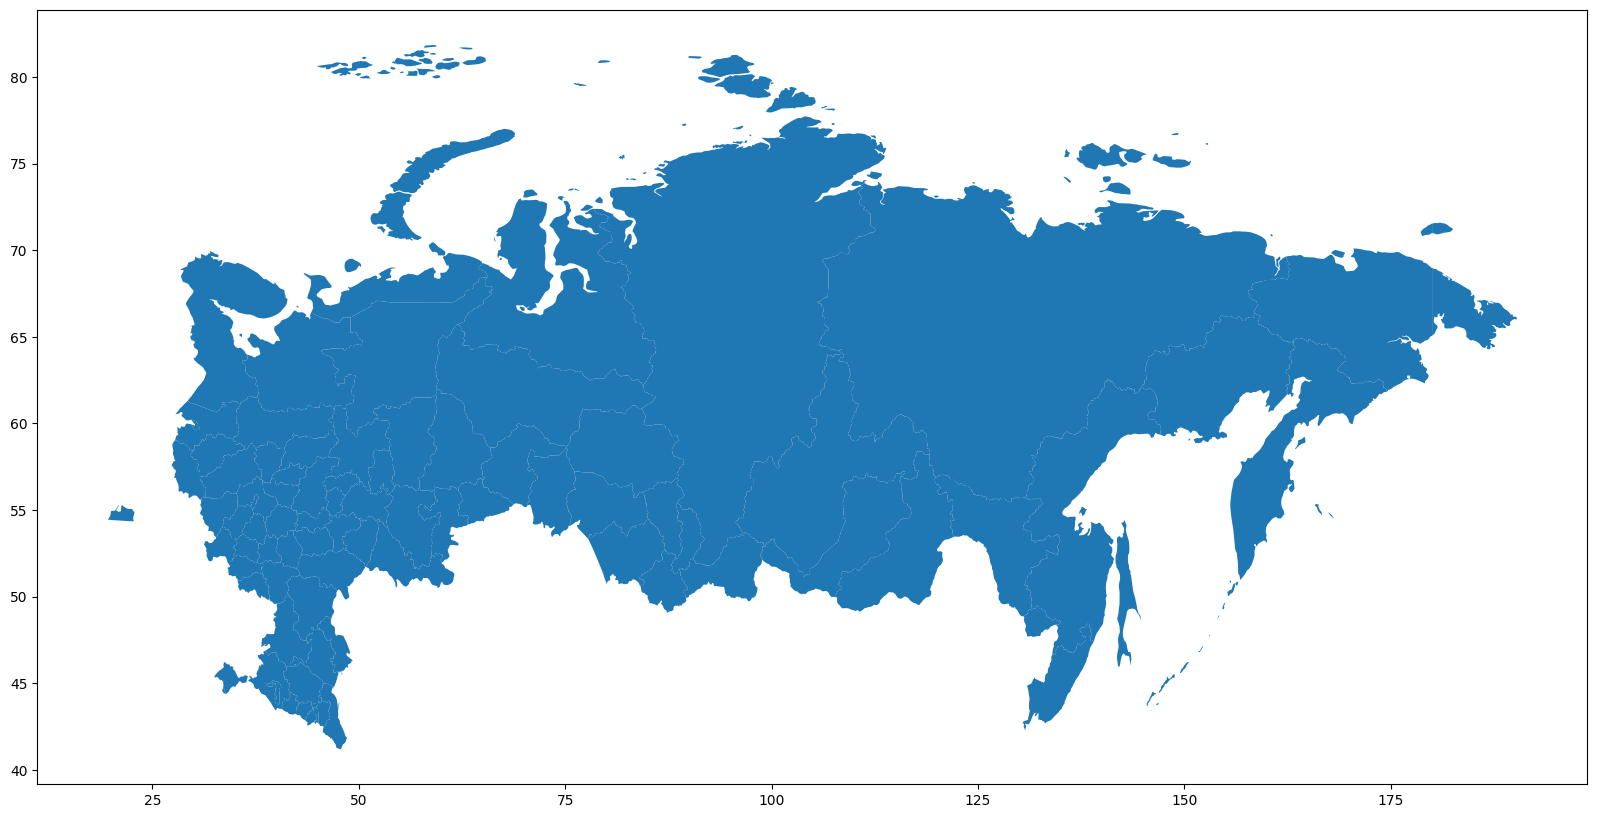

In [44]:
def shift_geom(geom, cutoff=0):
    border = shapely.geometry.LineString([(cutoff,-90),(cutoff, 90)])
    splitted_geom = shapely.ops.split(geom, border)
    moved_geom = []

    for item in splitted_geom:
        minx, miny, maxx, maxy = item.bounds
        if minx < cutoff:
            moved_geom.append(shapely.affinity.translate(item, xoff=cutoff + 360))
        else:
            moved_geom.append(item)

    # got `moved_geom` as the moved geometry            
    return shapely.ops.unary_union(moved_geom)

russia_copy = russia.copy()
russia_copy.loc[
    russia.name == 'Chukchi Autonomous Okrug', 'geometry'
] = russia_copy.loc[
    russia.name == 'Chukchi Autonomous Okrug', 'geometry'
].apply(shift_geom)

russia_copy = russia_copy

russia_copy.plot(figsize=(20, 20))

#### France

<AxesSubplot:>

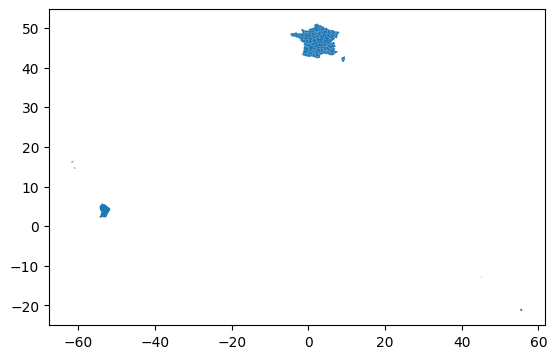

In [45]:
france = df[df.admin == 'France']
france.plot()

Ignore all the oversea islands

<AxesSubplot:>

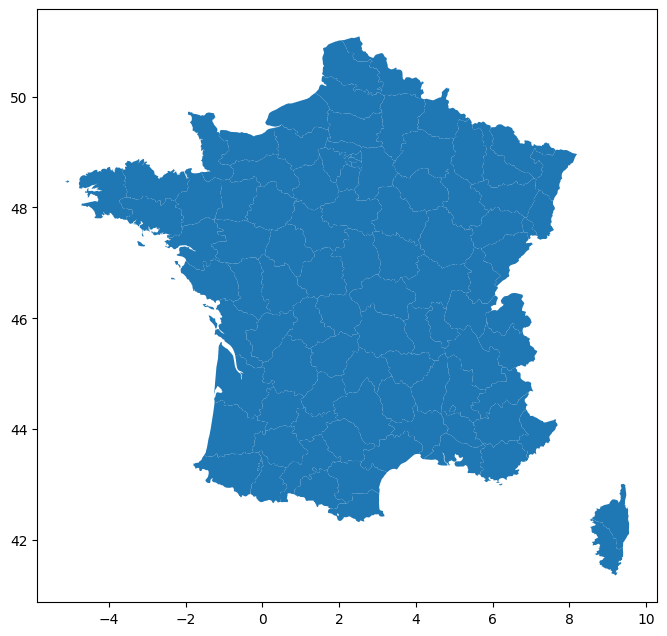

In [46]:
def apply_bounds(df, northwest, southeast):
    x1, y1 = northwest
    x2, y2 = southeast
    boundry = shapely.geometry.Polygon([(x1, y1),(x1, y2), (x2, y2), (x2, y1)])
    df = df.copy()
    return df[df.geometry.apply(lambda x: boundry.contains(x))]

france_copy = apply_bounds(france, (-20, 60), (20, 20))
france_copy.plot(figsize=(8, 8))

#### Netherlands

<AxesSubplot:>

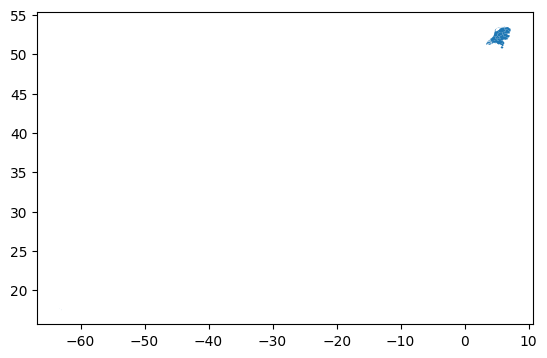

In [47]:
netherlands = df[df.admin == 'Netherlands']
netherlands.plot()

<AxesSubplot:>

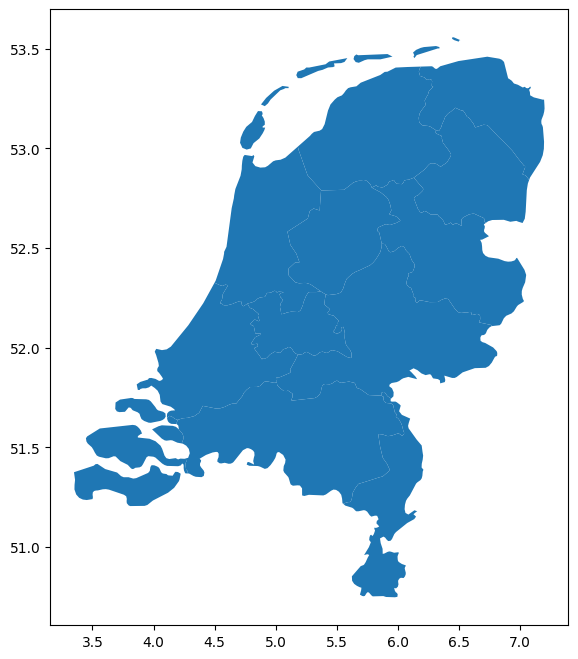

In [48]:
netherlands_copy = apply_bounds(netherlands, (-20, 60), (20, 20))
netherlands_copy.plot(figsize=(8, 8))

#### UK

<AxesSubplot:>

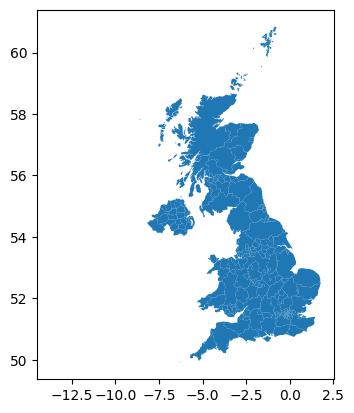

In [49]:
uk = df[df.admin == 'United Kingdom']
uk.plot()

<AxesSubplot:>

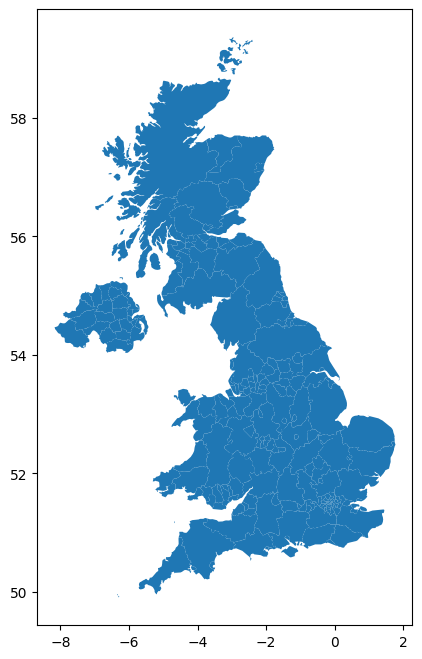

In [50]:
uk_copy = apply_bounds(uk, (-10, 60), (20, 20))
uk_copy.plot(figsize=(8, 8))

## Output GeoJSON

In [51]:
alt_maps = {
    "finland": finland_copy,
    "china": china_copy,
    "usa": usa_copy,
    "france": france_copy,
    "netherlands": netherlands_copy,
    "norway": norway_copy,
    "uk": uk_copy,
    "russia": russia_copy,
    "spain": spain_copy,
    "portugal": portugal_copy,
}

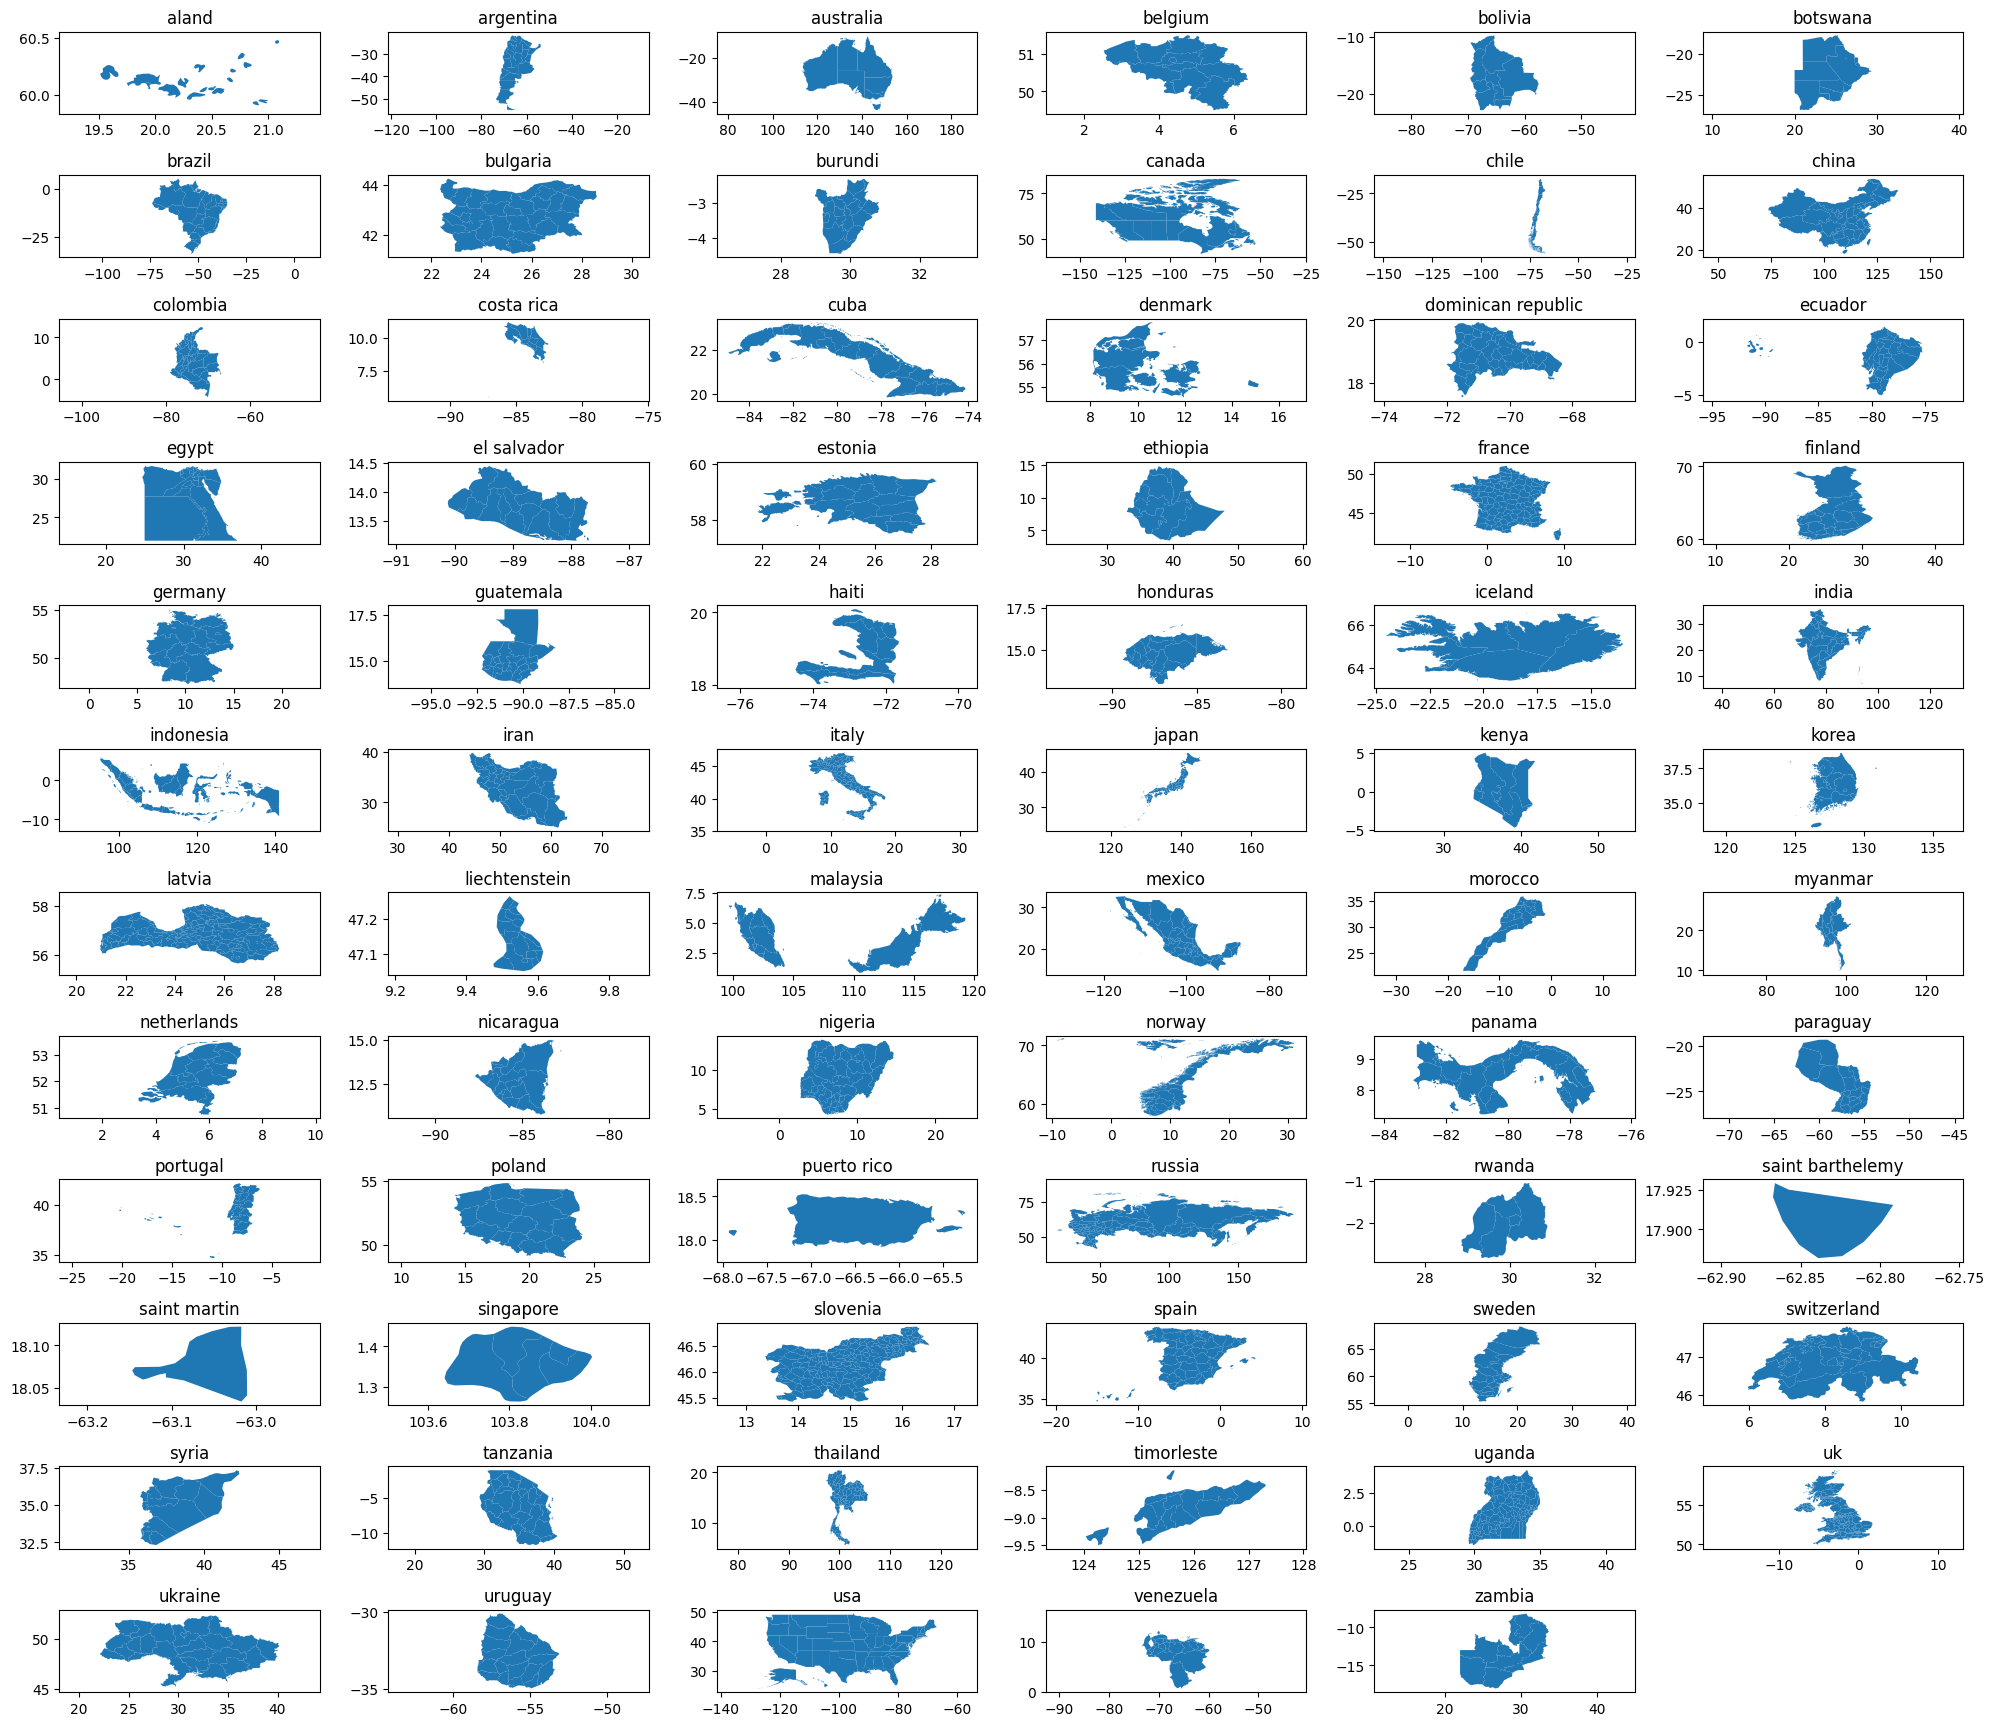

In [52]:
plot_all_countries()

In [53]:
simplify_factors = {
    "uk": 0.005,
}
useful_columns = ["ISO", "NAME_1", "geometry"]

def get_simplify_factor_by_size(gdf):
    xmin, ymin, xmax, ymax = shapely.ops.unary_union(gdf["geometry"]).bounds
    size = (xmax - xmin) * (ymax - ymin)
    print("Size", round(size, 3), end="\t")
    if size > 1000: return 0.03
    if size > 300: return 0.02
    if size > 100: return 0.01
    return 0
    
def simplify_if_needed(country, gdf):
    """Simplify the maps based on country size"""
    country_alias = country_name_aliases.get(country, country)
    if country_alias in df_50m["admin"].str.lower().unique():
        return
    
    factor = simplify_factors.get(country) or get_simplify_factor_by_size(gdf)
        
    if factor:
        gdf["geometry"] = gdf.simplify(factor)

def save_geojson(country):
    gdf = get_gdf(country)
    print(country, end="\t")
    
    # For backward compatibility
    gdf["ISO"] = gdf["iso_3166_2"]
    gdf["NAME_1"] = gdf["name"]
    
    simplify_if_needed(country, gdf)
        
    print(f'Saving geojson for {country}...')
    gdf[useful_columns].to_file(f"../src/countries/{country}.geojson", driver="GeoJSON")

for country in countries:
    save_geojson(country)
    
print("Done.                          ")

aland	Size 0.913	Saving geojson for aland...
argentina	Size 662.347	Saving geojson for argentina...
australia	Saving geojson for australia...
belgium	Size 7.709	Saving geojson for belgium...
bolivia	Size 161.264	Saving geojson for bolivia...
botswana	Size 85.376	Saving geojson for botswana...
brazil	Saving geojson for brazil...
bulgaria	Size 18.715	Saving geojson for bulgaria...
burundi	Size 3.99	Saving geojson for burundi...
canada	Saving geojson for canada...
chile	Size 1652.977	Saving geojson for chile...
china	Saving geojson for china...
colombia	Size 264.526	Saving geojson for colombia...
costa rica	Size 25.939	Saving geojson for costa rica...
cuba	Size 37.185	Saving geojson for cuba...
denmark	Size 22.461	Saving geojson for denmark...
dominican republic	Size 8.806	Saving geojson for dominican republic...
ecuador	Size 112.048	Saving geojson for ecuador...
egypt	Size 117.982	Saving geojson for egypt...
el salvador	Size 3.116	Saving geojson for el salvador...
estonia	Size 13.694	Sav